In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.models import word2vec

In [2]:
# Reading the data
judgeData = pd.read_csv('./地方法院_10年rawdata.csv', encoding='utf-8-sig')
 
# Printing number of rows and columns
print(judgeData.shape)
 
# Printing sample rows
judgeData.head(5)

(78253, 8)


,judge_index,judge_year,judge_month,judge_title,judge_NO,judge_court,judge_link,judge_content
0,4,111,1,過失傷害,臺灣彰化地方法院 111 年度 交簡 字第 195 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:林燕輝犯汽車駕駛人無駕駛執照駕車過失傷害罪，處拘役參拾伍日，如易科罰金，以新臺幣壹仟元...
1,6,111,1,傷害致重傷害,臺灣彰化地方法院 111 年度 訴 字第 38 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:黃鈵淞犯傷害人致重傷罪，處有期徒刑壹年捌月，緩刑參年，緩刑期間付保護管束，並應支付被害...
2,18,111,1,重傷害,臺灣彰化地方法院 110 年度 訴 字第 577 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:王枷勛犯傷害罪，處有期徒刑陸月，如易科罰金，以新臺幣壹仟元折算壹日。犯罪事實一、王枷勛...
3,19,111,1,傷害,臺灣彰化地方法院 110 年度 訴 字第 618 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:陳燕蓉犯傷害罪，處拘役伍拾日，如易科罰金，以新臺幣壹仟元折算壹日。洪玉芳無罪。犯罪事實...
4,27,111,1,傷害,臺灣彰化地方法院 110 年度 簡上 字第 116 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:原判決撤銷。陳博義、王俊吉均無罪。理由一、公訴意旨略以：被告陳博義（綽號毛仔）、被告王...


judge_title
傷害         19590
傷害尊親屬         27
傷害尊親屬等        15
傷害尊親屬罪         6
傷害尊親屬罪等        1
           ...  
重傷害未遂          5
重傷害未遂等         1
重傷害等          49
重傷害致死          2
重傷害致死等         1
Length: 68, dtype: int64


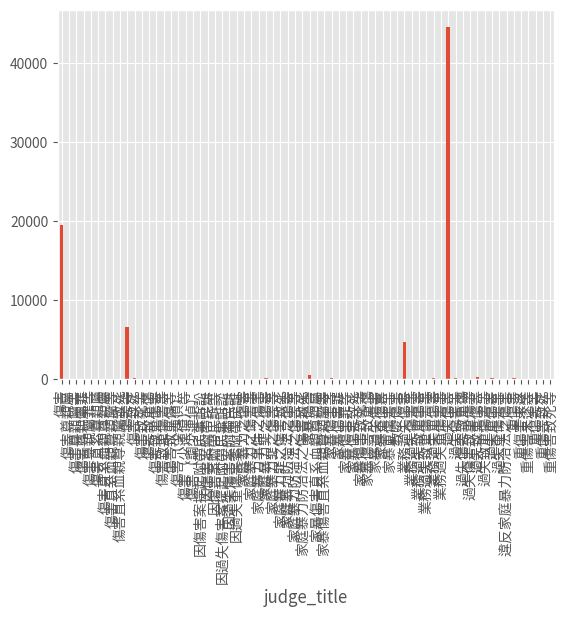

In [3]:
# 設定 matplotlib 字型，可顯示中文
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
# print(matplotlib.__file__)
# a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
# for i in a:
#     print(i)    
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# You can see there are 3 ticket types
print(judgeData.groupby('judge_title').size())
 
# Plotting the bar chart
%matplotlib inline
judgeData.groupby('judge_title').size().plot(kind='bar');

### k-means

In [4]:
data = pd.read_csv('./feature_1207_12.csv', encoding='utf-8')
data.head()

,其他,教育程度,Unnamed: 2,構成要件,Unnamed: 4,違法性,Unnamed: 6,罪責,Unnamed: 8,傷害方式,...,被告身心狀況,Unnamed: 26,被害身心狀況,Unnamed: 28,和解狀況,Unnamed: 30,告訴人和被告人之關係,Unnamed: 32,法官心證,Unnamed: 34
0,應予分論併罰,國小畢業,高中以下,傷害之犯意,傷害罪:1,不合於正當防衛,1.0,為累犯,1.0,徒手毆打,...,癲癇症,不良,癲癇症,不良,無法達成和、調解,有意願無成功,家庭成員關係,有血緣,未達於通常一般人不致有所懷疑,1.0
1,為想像競合犯,國小肄業,高中以下,傷害之不確定故意,傷害罪:1,尚符合正當防衛,0.0,不依刑法第47條第1項規定加重其刑,0.0,以頭撞擊,...,良性陣發性眩暈,不良,頸椎退化性脊椎炎,不良,無法達成和解,有意願無成功,家庭成員關係,有血緣,未達於一般人不致有所懷疑,1.0
2,洵不足採,初中畢業,高中以下,具有主觀上傷害之犯意,傷害罪:1,尚符合緊急避難,0.0,爰依刑法第62條前段之規定,2.0,推打,...,頸椎退化性脊椎炎,不良,高血壓,不良,無法達成調解,有意願無成功,有家庭暴力防治法第3條第4款規定之家庭成員關係,有血緣,無足採酌,1.0
3,依前揭規定加重其刑,初中肄業,高中以下,基於傷害,傷害罪:1,不合於緊急避難,1.0,符合自首要件,2.0,徒手推打,...,高血壓,不良,雙相情緒障礙症,不良,告訴人無和解意願,有意願無成功,有家庭暴力防治法第3條第1款規定之家庭成員關係,有血緣,犯後態度方面難以對被告為有利之考量,1.0
4,無因果關係,國中畢業,高中以下,毀敗或嚴重減損,重傷害:1,尚符合父母懲戒權,0.0,固為累犯,0.0,拳打腳踢,...,雙相情緒障礙症,不良,重度身心障礙,不良,有與告訴人和解之意願,有意願無成功,有家庭暴力防治法第3條第2款規定之家庭成員關係,有血緣,NaN,NaN


In [8]:
# feature dataframe
features = data.drop(data.iloc[:,::2], axis=1)
features_list = []

for i in range(len(features.columns)):
    features_clean = features.iloc[:,i].dropna()#.valuse.tolist()
    for j in features_clean:
        features_list.append(j)
        
features_list

['國小畢業',
 '國小肄業',
 '初中畢業',
 '初中肄業',
 '國中畢業',
 '國中肄業',
 '高中畢業',
 '高中肄業',
 '高職畢業',
 '高職肄業',
 '大學畢業',
 '大學肄業',
 '大專畢業',
 '大專肄業',
 '五專畢業',
 '五專肄業',
 '二專畢業',
 '二專肄業',
 '專科畢業',
 '專科肄業',
 '三專畢業',
 '三專肄業',
 '傷害之犯意',
 '傷害之不確定故意',
 '具有主觀上傷害之犯意',
 '基於傷害',
 '毀敗或嚴重減損',
 '毀敗或嚴重毀損',
 '未達毀敗或減損',
 '之重傷害結果而未遂',
 '重傷害之不確定故意',
 '重傷害之故意',
 '如經過相當之診治而能回復原狀',
 '或雖不能回復原狀而僅減衰其效用者',
 '仍不得謂為該款之重傷',
 '未有重傷害結果',
 '應以未遂論',
 '毀敗或嚴重減損',
 '毀敗或嚴重毀損',
 '之重傷害結果而未遂',
 '未達毀敗或減損',
 '基於使人受重傷害之犯意',
 '傷害他人身體之犯意',
 '無不能注意之情事',
 '無不能注意之情事',
 '無不能注意之情形',
 '竟疏未注意',
 '疏未注意上開注意義務',
 '違反上開注意義務',
 '違反前揭注意義務',
 '違反前開注意義務',
 '本應具有前揭注意義務',
 '本應具有前開注意義務',
 '本應具有上開注意義務',
 '具有相當因果關係',
 '本應審慎注意',
 '不合於正當防衛',
 '尚符合正當防衛',
 '尚符合緊急避難',
 '不合於緊急避難',
 '尚符合父母懲戒權',
 '不合於父母懲戒權',
 '尚符合教師懲戒權',
 '不合於教師懲戒權',
 '無正當防衛可言',
 '無主張正當防衛',
 '無主張防衛',
 '與正當防衛要件不合',
 '與正當防衛之要件不合',
 '難認符合正當防衛',
 '符合正當防衛而阻卻違法',
 '為累犯',
 '不依刑法第47條第1項規定加重其刑',
 '爰依刑法第62條前段之規定',
 '符合自首要件',
 '固為累犯',
 '無加重最低法定本刑之必要',
 '不再依刑法第47條第1項之規定',
 '瘖啞人士',
 '爰依刑法第20條規定減輕其刑',
 '爰依刑法第20條之規定減輕其刑',
 '刑法第5

In [6]:
model = word2vec.Word2Vec.load('model_judge_d250_sg_s10_ep10.model')

In [10]:
vector_list = []
for w in features_list:
    try:
        vector = model.wv[w]
        vector_list.append(vector)
#         word_vectors = np.array(vector_list)
    except:
        print(f'{w} is not in {model}')

print(vector_list)

無不能注意之情事 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
無不能注意之情事 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
無不能注意之情形 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
竟疏未注意 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
疏未注意上開注意義務 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
違反上開注意義務 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
違反前揭注意義務 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
違反前開注意義務 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
本應具有前揭注意義務 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
本應具有前開注意義務 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
本應具有上開注意義務 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
具有相當因果關係 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
本應審慎注意 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
尚符合正當防衛 is not in Word2Vec<vocab=766205, vector_size=250, alp

In [11]:
len(vector_list)

300

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

X = vector_list
# y = vector_list[]

kmeans = KMeans(n_clusters=6)  # n_clusters，分群
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print('centroids: {}'.format(centroids))
print('prediction on each data: {}'.format(labels))

# accuracy = accuracy_score(y, labels)
# num_correct_samples = accuracy_score(y, labels, normalize=False)

# print('number of correct sample: {}'.format(num_correct_samples))
# print('accuracy: {}'.format(accuracy))

centroids: [[ 0.03405824  0.13129928  0.10168224 ... -0.15369482 -0.12410877
  -0.02845273]
 [-0.30421216  0.15352836  0.43263958 ...  0.14309603 -0.49814537
  -0.1421661 ]
 [ 0.2438367   0.21688329  0.27897064 ... -0.09227145  0.3173132
  -0.1040108 ]
 [ 0.07971176 -0.01703796 -0.09192245 ...  0.09557556  0.03492003
   0.06724414]
 [-0.27186744  0.25856424  0.39997923 ... -0.16189472 -0.19820343
   0.14292345]
 [ 0.04702199  0.15940445  0.26950757 ... -0.11609386 -0.146846
  -0.04627012]]
prediction on each data: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 0 4 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 4 0 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 0 4 4
 4 4 4 4 4 4 4 0 4 0 4 4 4 4 4 4 4 4 4 0 4 4 4 4 0 4 4 4 4 4 4 0 4 4 4 4 4
 0 0 0 0 0 5 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 5 2 2 2 2 2 2 2 2 0 0
 2 2 2 2 2 2 2 2 2 0 0 2 0 5 5 0 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 5 5 5
 5 0 2 0 2 0 2 2 4 3 5 5 5 5 3 5 5 5 0 3 5 0 0 5 5 3 5 4 0 0 0 5 0 5 0 3 5
 5 0 0 5 5 5 0 0 0 5 5 5 5 0 0

In [36]:
from sklearn.cluster import KMeans
X = vector_list
# type(X)
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')  # s，size

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: list indices must be integers or slices, not tuple

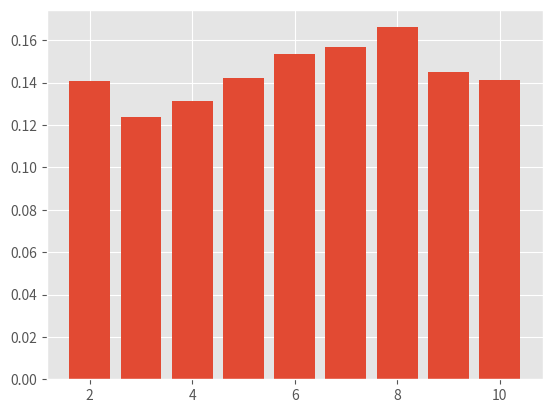

[0.14082034, 0.1237884, 0.13126338, 0.14224906, 0.15366723, 0.15704529, 0.16613978, 0.14501531, 0.14144512]


In [28]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
X = vector_list

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)